In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import dask.dataframe as dd

from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.utils.data as data_utils
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

## Loading an checking Data

In [2]:
data = pd.read_csv('data/breast_cancer.csv', delimiter=',')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.isnull().values.any()

False

There is no missing Data

In [5]:
data.shape

(569, 32)

In [11]:
data_s = data.copy()

In [12]:
data_s['label'] = np.where(data_s['diagnosis']== 'M', int(1), int(0))

In [13]:
data_ss = data_s.drop(['id', 'diagnosis'], axis = 1)
data_ss.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Splitting Data into Training- and Validation6- Set

In [14]:
val_size = 89
train_size = len(data_ss)-val_size

train_ds, val_ds = random_split(data_ss, [train_size, val_size])
len(train_ds), len(val_ds)


(480, 89)

## DataLoader

In [96]:
split_frac = 0.85
split = int(split_frac * len(data_ss)) #splitt between train and val

train_label = torch.tensor(data_ss['label'][0:(split-1)].values)
train_label = train_label.long()
train = torch.tensor(data_ss[0:(split-1)].drop('label', axis = 1).values.astype(np.float32)) 
train_tensor = data_utils.TensorDataset(train, train_label) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = 15, shuffle = True)

val_label = torch.tensor(data_ss['label'][split:].values)
val_label = val_label.long()
val = torch.tensor(data_ss[split:].drop('label', axis = 1).values.astype(np.float32))
val_tensor = data_utils.TensorDataset(val, val_label) 
val_loader = data_utils.DataLoader(dataset = val_tensor, batch_size = 15, shuffle = True)
train.shape

torch.Size([482, 30])

We can now create PyTorch data loaders for training and validation.

## Creating Model

In [97]:
input_size = 30
hidden_size = 20
num_classes = 2

In [19]:
class BCModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [20]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [21]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [71]:
model = BCModel(input_size, hidden_size=15, out_size = num_classes)

In [44]:
for t in model.parameters():
    print(t.shape)

torch.Size([15, 30])
torch.Size([15])
torch.Size([2, 15])
torch.Size([2])


In [72]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 57.97709655761719, 'val_acc': 0.222222238779068}

In [47]:
for features, labels in train_loader:
    outputs = model(features)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 4.558480739593506
outputs.shape :  torch.Size([15, 2])
Sample outputs :
 tensor([[-3.0917, -3.9232],
        [-0.6579, -6.3898]])


In [36]:
import jovian

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "marc1971/ubung-breast-cancer" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/marc1971/ubung-breast-cancer


'https://jovian.ai/marc1971/ubung-breast-cancer'

## Train the Model

In [40]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

 ### Is there a GPU availabel??

In [49]:
torch.cuda.is_available()

False

In [50]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [51]:
device = get_default_device()
device

device(type='cpu')

Next, let's define a function that can move data and model to a chosen device.

In [53]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [73]:
for features, labels in train_loader:
    print(features.shape)
    features = to_device(features, device)
    print(features.device)
    break

torch.Size([15, 30])
cpu


Finally, we define a `DeviceDataLoader` class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch data loader. All we need is an `__iter__` method to retrieve batches of data and an `__len__` method to get the number of batches.

In [55]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

The `yield` keyword in Python is used to create a generator function that can be used within a `for` loop, as illustrated below.

In [56]:
def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10
20
30


We can now wrap our data loaders using `DeviceDataLoader`.

In [57]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

Tensors moved to the GPU have a `device` property which includes that word `cuda`. Let's verify this by looking at a batch of data from `valid_dl`.

In [58]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cpu
yb: tensor([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])


## Now training the Model!

We'll define two functions: fit and evaluate to train the model using gradient descent and evaluate its performance on the validation set. For a detailed walkthrough of these functions, check out the previous tutorial.

In [59]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

Before we train the model, we need to ensure that the data and the model's parameters (weights and biases) are on the same device (CPU or GPU). We can reuse the `to_device` function to move the model's parameters to the right device. 

In [98]:
model = BCModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

BCModel(
  (linear1): Linear(in_features=30, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=2, bias=True)
)

Let's see how the model performs on the validation set with the initial set of weights and biases.

In [99]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 50.83905029296875, 'val_acc': 0.256565660238266}]

The initial accuracy is around 25%.

Let's train the model for five epochs and look at the results. We can use a relatively high learning rate of 0.5.

In [100]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7105, val_acc: 0.2525
Epoch [1], val_loss: 0.5990, val_acc: 0.7515
Epoch [2], val_loss: 0.6339, val_acc: 0.7394
Epoch [3], val_loss: 0.5697, val_acc: 0.7475
Epoch [4], val_loss: 0.5737, val_acc: 0.7394


Let's train the model for five more epochs at a lower learning rate of 0.1 to improve the accuracy further.

In [102]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6113, val_acc: 0.7434
Epoch [1], val_loss: 0.5989, val_acc: 0.7515
Epoch [2], val_loss: 0.6286, val_acc: 0.7475
Epoch [3], val_loss: 0.6471, val_acc: 0.7475
Epoch [4], val_loss: 0.6182, val_acc: 0.7434


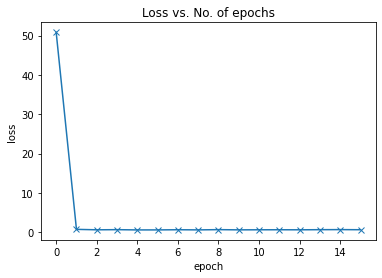

In [103]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

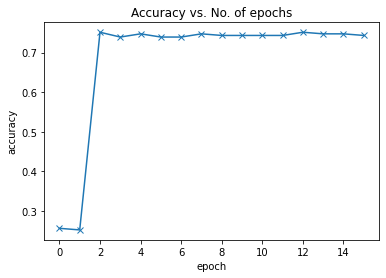

In [104]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [68]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "marc1971/ubung-breast-cancer" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/marc1971/ubung-breast-cancer


'https://jovian.ai/marc1971/ubung-breast-cancer'